In [1]:
from numpy import *
import matplotlib.pyplot as plt


In [2]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))


In [3]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]


In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    b_values = []
    m_values = []
    error_values = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        b_values.append(b)
        m_values.append(m)
        error_values.append(compute_error_for_line_given_points(b, m, points))
    return [b, m, b_values, m_values, error_values]


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


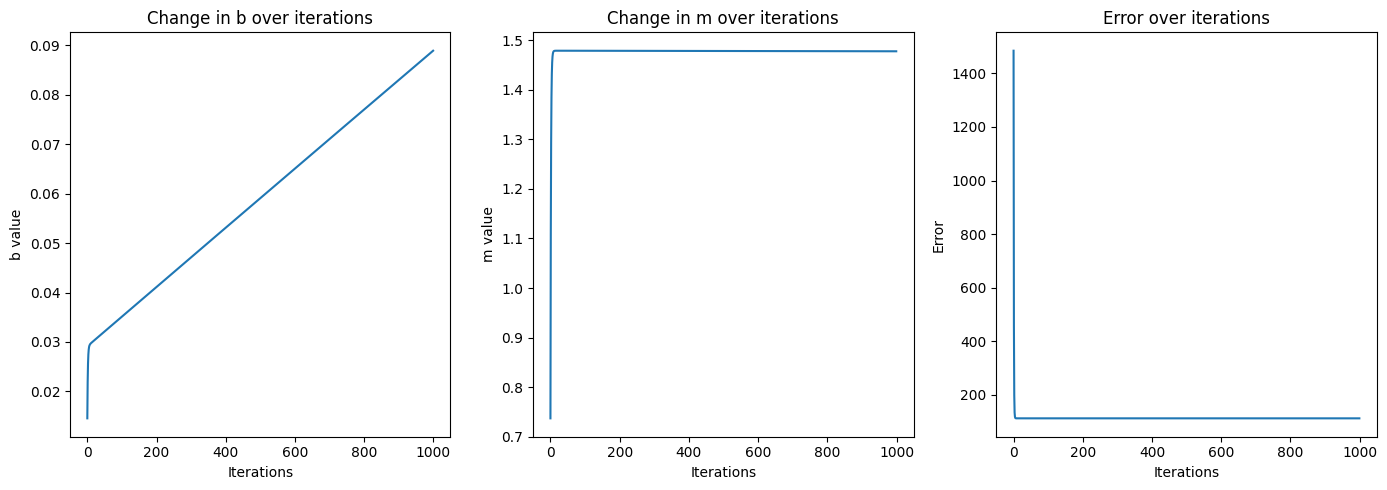

In [5]:
def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    b, m, b_values, m_values, error_values = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    # Plotting the results
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 3, 1)
    plt.plot(b_values)
    plt.xlabel('Iterations')
    plt.ylabel('b value')
    plt.title('Change in b over iterations')

    plt.subplot(1, 3, 2)
    plt.plot(m_values)
    plt.xlabel('Iterations')
    plt.ylabel('m value')
    plt.title('Change in m over iterations')

    plt.subplot(1, 3, 3)
    plt.plot(error_values)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Error over iterations')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    run()
